# TSF - Task 2 - To Explore Unsupervised Machine Learning
From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

Dataset : https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing data

In [2]:
data = pd.read_csv("Iris.csv", index_col=0)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


# Pulling the information from the given data

In [3]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Checking for null or missing values

In [4]:
data.isnull().sum()


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Checking for datatypes

In [5]:
print(data.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


# Plotting the given data

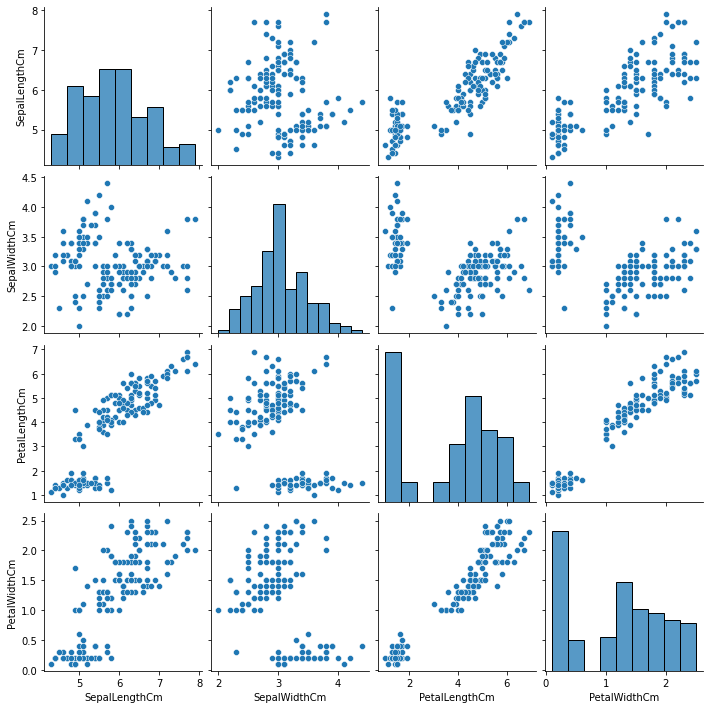

In [6]:
sns.pairplot(data, palette='viridis')

# Separating the features from the dataset

In [7]:
x = data.iloc[:,[0,1,2,3]].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

# Finding the optimum number of clusters using the Elbow method

In [8]:
from sklearn.cluster import KMeans
clusters =[]
for i in range(1,15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state =0)
    kmeans.fit(x)
    clusters.append(kmeans.inertia_)

Text(0, 0.5, 'Within cluster sum of squares')

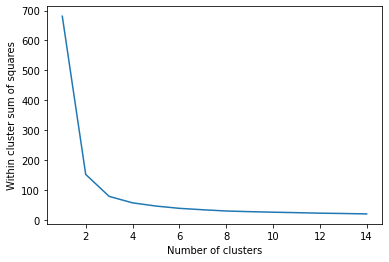

In [9]:
plt.plot(range(1,15), clusters)
plt.xlabel("Number of clusters")
plt.ylabel("Within cluster sum of squares")

# Applying KMeans to the dataset

In [10]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state= 0)
y_kmeans = kmeans.fit_predict(x)

# Visuaization of clusters

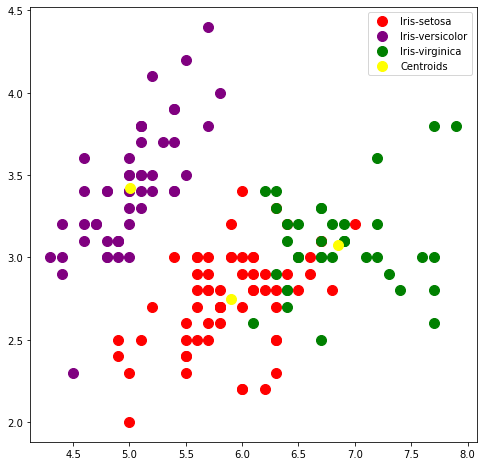

In [11]:
plt.figure(figsize=(8,8))
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1],s=100, c='red', label ='Iris-setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1],s=100, c='purple', label ='Iris-versicolor')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1],s=100, c='green', label ='Iris-virginica')
# Centroid
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c="yellow", label ='Centroids')
plt.legend()